# 1. Imporation des librairies

In [855]:
import pandas as pd
import plotly.figure_factory as ff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
from plotly.subplots import make_subplots
from math import ceil
import time
from scipy.stats import ks_2samp, bartlett,ttest_ind



from sklearn.decomposition import PCA

# 2. Importation du fichier final

In [856]:
# chemin du dossier data_set
data_set_path = '~/project9/V1/dataset/'

# Lecture du data set nettoyé
final_df = pd.read_csv(data_set_path+'final-file.csv',encoding='utf-16-le')

Un aperçu du data set

In [857]:
final_df.head()

,Pays,Disponibilité de protéines en quantité (g/personne),Importations - gramme par habitant,Production gramme par habitant,Disponibilité intérieure gramme par habitant,Nourriture gramme par habitant,Produit intérieur brut en dollars par habitant
0,Afghanistan,194.4,798.983627,771.432467,1570.416094,1515.313775,520.616409
1,Afrique du Sud,5079.6,9016.000700,29240.609274,37151.535958,35695.644795,6121.876572
2,Albanie,2253.6,13175.372178,4507.364166,16295.855063,16295.855063,4514.204908
3,Algérie,709.2,48.321797,6644.247125,6692.568922,6378.477240,4109.696001
4,Allemagne,2865.6,10186.501412,18316.345769,21038.391871,19465.654124,44651.829102


# 3. Matrice de corrélation entre les variable

/tmp/ipykernel_9827/3303323879.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



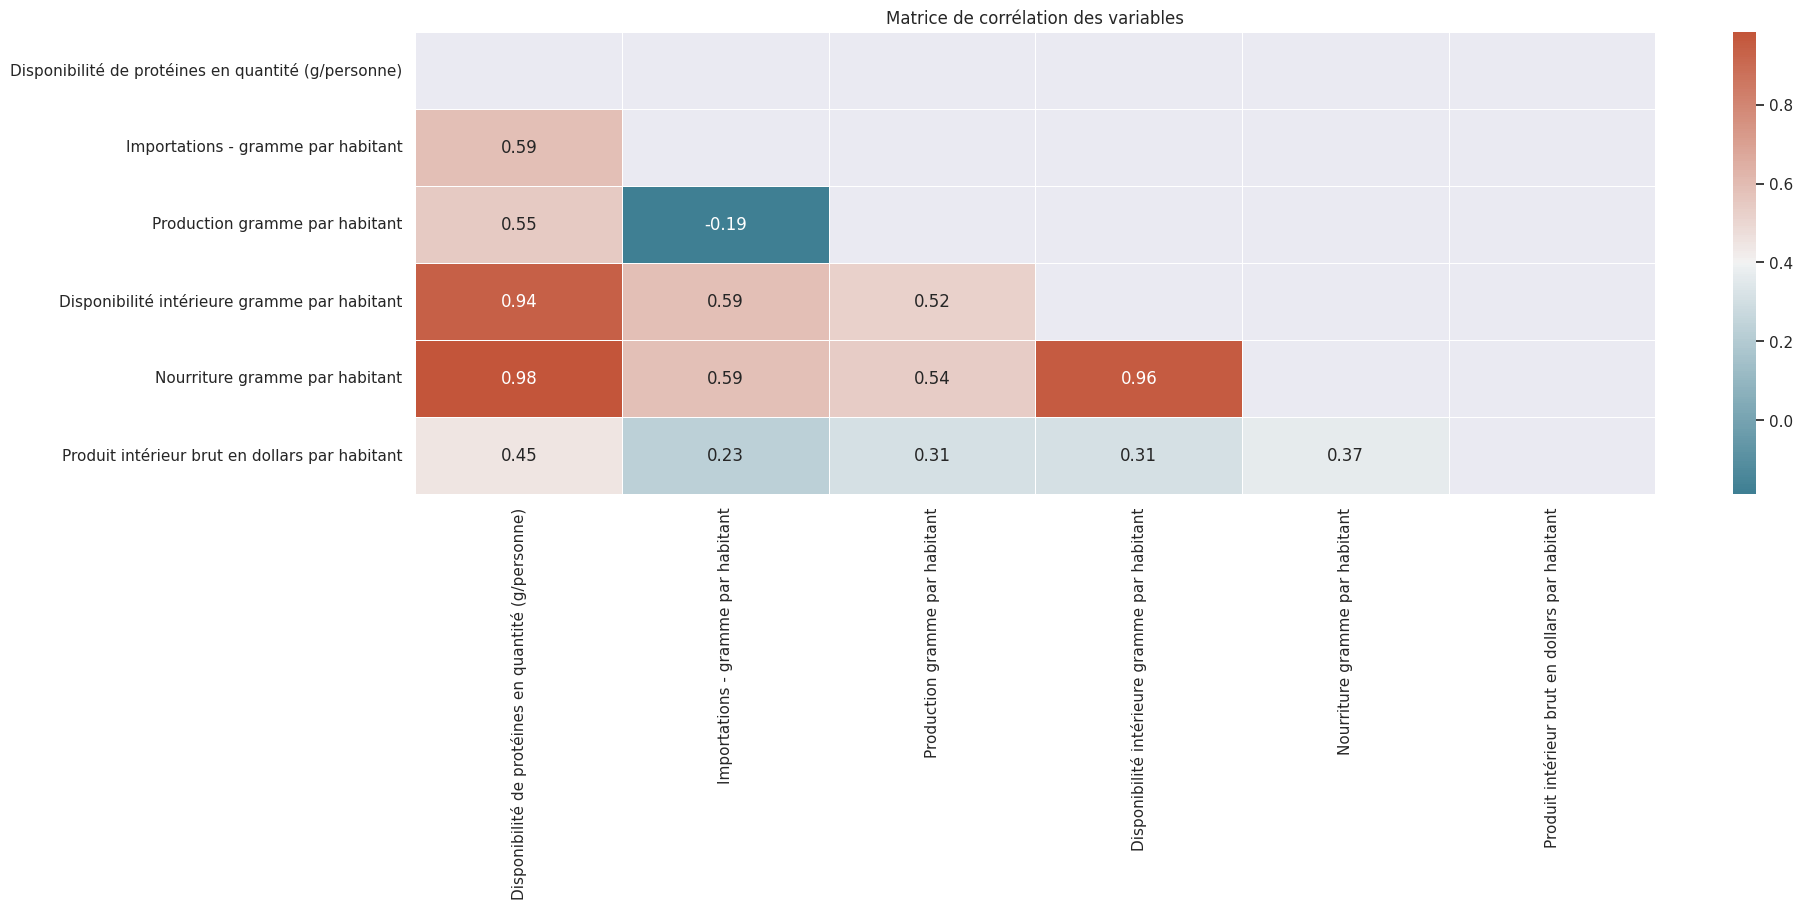

In [858]:
# Création de la matrice de corrélation des variables

matrix = final_df.corr()

fig, ax = plt.subplots(figsize=(20, 6))
# Exclusion des valeurs en double et des valeurs en diagonales (retour faux) dans le but de ne pas les afficher dans notre heatmap option mask de la fonction heatmap sns
mask = np.triu(np.ones_like(matrix, dtype=bool))

#Création de la heatmap de corrélationb des variables


sns.heatmap(matrix,mask=mask,xticklabels=matrix.columns.values,
                 yticklabels=matrix.columns.values,cmap=sns.diverging_palette(220, 20, n=200),annot=True,linewidths=.5)
plt.title('Matrice de corrélation des variables')
plt.show()

# 3. Reformatage de la table principale 

Mise en index des pays

In [859]:
final_df = final_df.set_index('Pays', drop=True, append=False, inplace=False, verify_integrity=False)
final_df.head()


,Disponibilité de protéines en quantité (g/personne),Importations - gramme par habitant,Production gramme par habitant,Disponibilité intérieure gramme par habitant,Nourriture gramme par habitant,Produit intérieur brut en dollars par habitant
Pays,,,,,,
Afghanistan,194.4,798.983627,771.432467,1570.416094,1515.313775,520.616409
Afrique du Sud,5079.6,9016.000700,29240.609274,37151.535958,35695.644795,6121.876572
Albanie,2253.6,13175.372178,4507.364166,16295.855063,16295.855063,4514.204908
Algérie,709.2,48.321797,6644.247125,6692.568922,6378.477240,4109.696001
Allemagne,2865.6,10186.501412,18316.345769,21038.391871,19465.654124,44651.829102


Variable X correpondant aux valeurs des variables

In [860]:
X = final_df.values
X[:2]


array([[  194.4       ,   798.9836267 ,   771.43246716,  1570.41609387,
         1515.31377478,   520.61640928],
       [ 5079.6       ,  9016.00069995, 29240.60927396, 37151.53595816,
        35695.64479455,  6121.87657218]])

Dimensions de la matrice :

In [861]:
X.shape

(168, 6)

Le nom des pays sont mis dans la variable country

In [862]:
country =  final_df.index
country

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe'],
      dtype='object', name='Pays', length=168)

Le nom des colonnes est enregistré dans la variable features

In [863]:
features = final_df.columns
features

Index(['Disponibilité de protéines en quantité (g/personne)',
       'Importations - gramme par habitant', 'Production gramme par habitant',
       'Disponibilité intérieure gramme par habitant',
       'Nourriture gramme par habitant',
       'Produit intérieur brut en dollars par habitant'],
      dtype='object')

# 4. Centrage et réduction des données

In [864]:
scaler = StandardScaler()

# Mise à l'échelle des données par centrage réduction des données

scaled_X  = scaler.fit_transform(X)
scaled_X[:2]

array([[-1.19507835, -0.54490459, -0.9019019 , -1.13222944, -1.19669591,
        -0.70773544],
       [ 1.22819997, -0.10543045,  0.74771809,  0.79591946,  0.95178991,
        -0.41995484]])

En ayant centré réduit les données on s'attend à obtenir une moyenne de 0 (car centrage) et écart de type de 1 (car réduction) :

In [865]:
# calcul des moyenne et écarts types pour chaque variables

idx = ["mean", "std"]   

pd.DataFrame(scaled_X).describe().round(2).loc[idx, :]


,0,1,2,3,4,5
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


Les résultat obtenu sont correct le centrage et réduction des données a réussi

# 5. Classification ascendante hierarchiques (dendrogramme)

Creation d'un dendogramme avec corrélation des attributs 

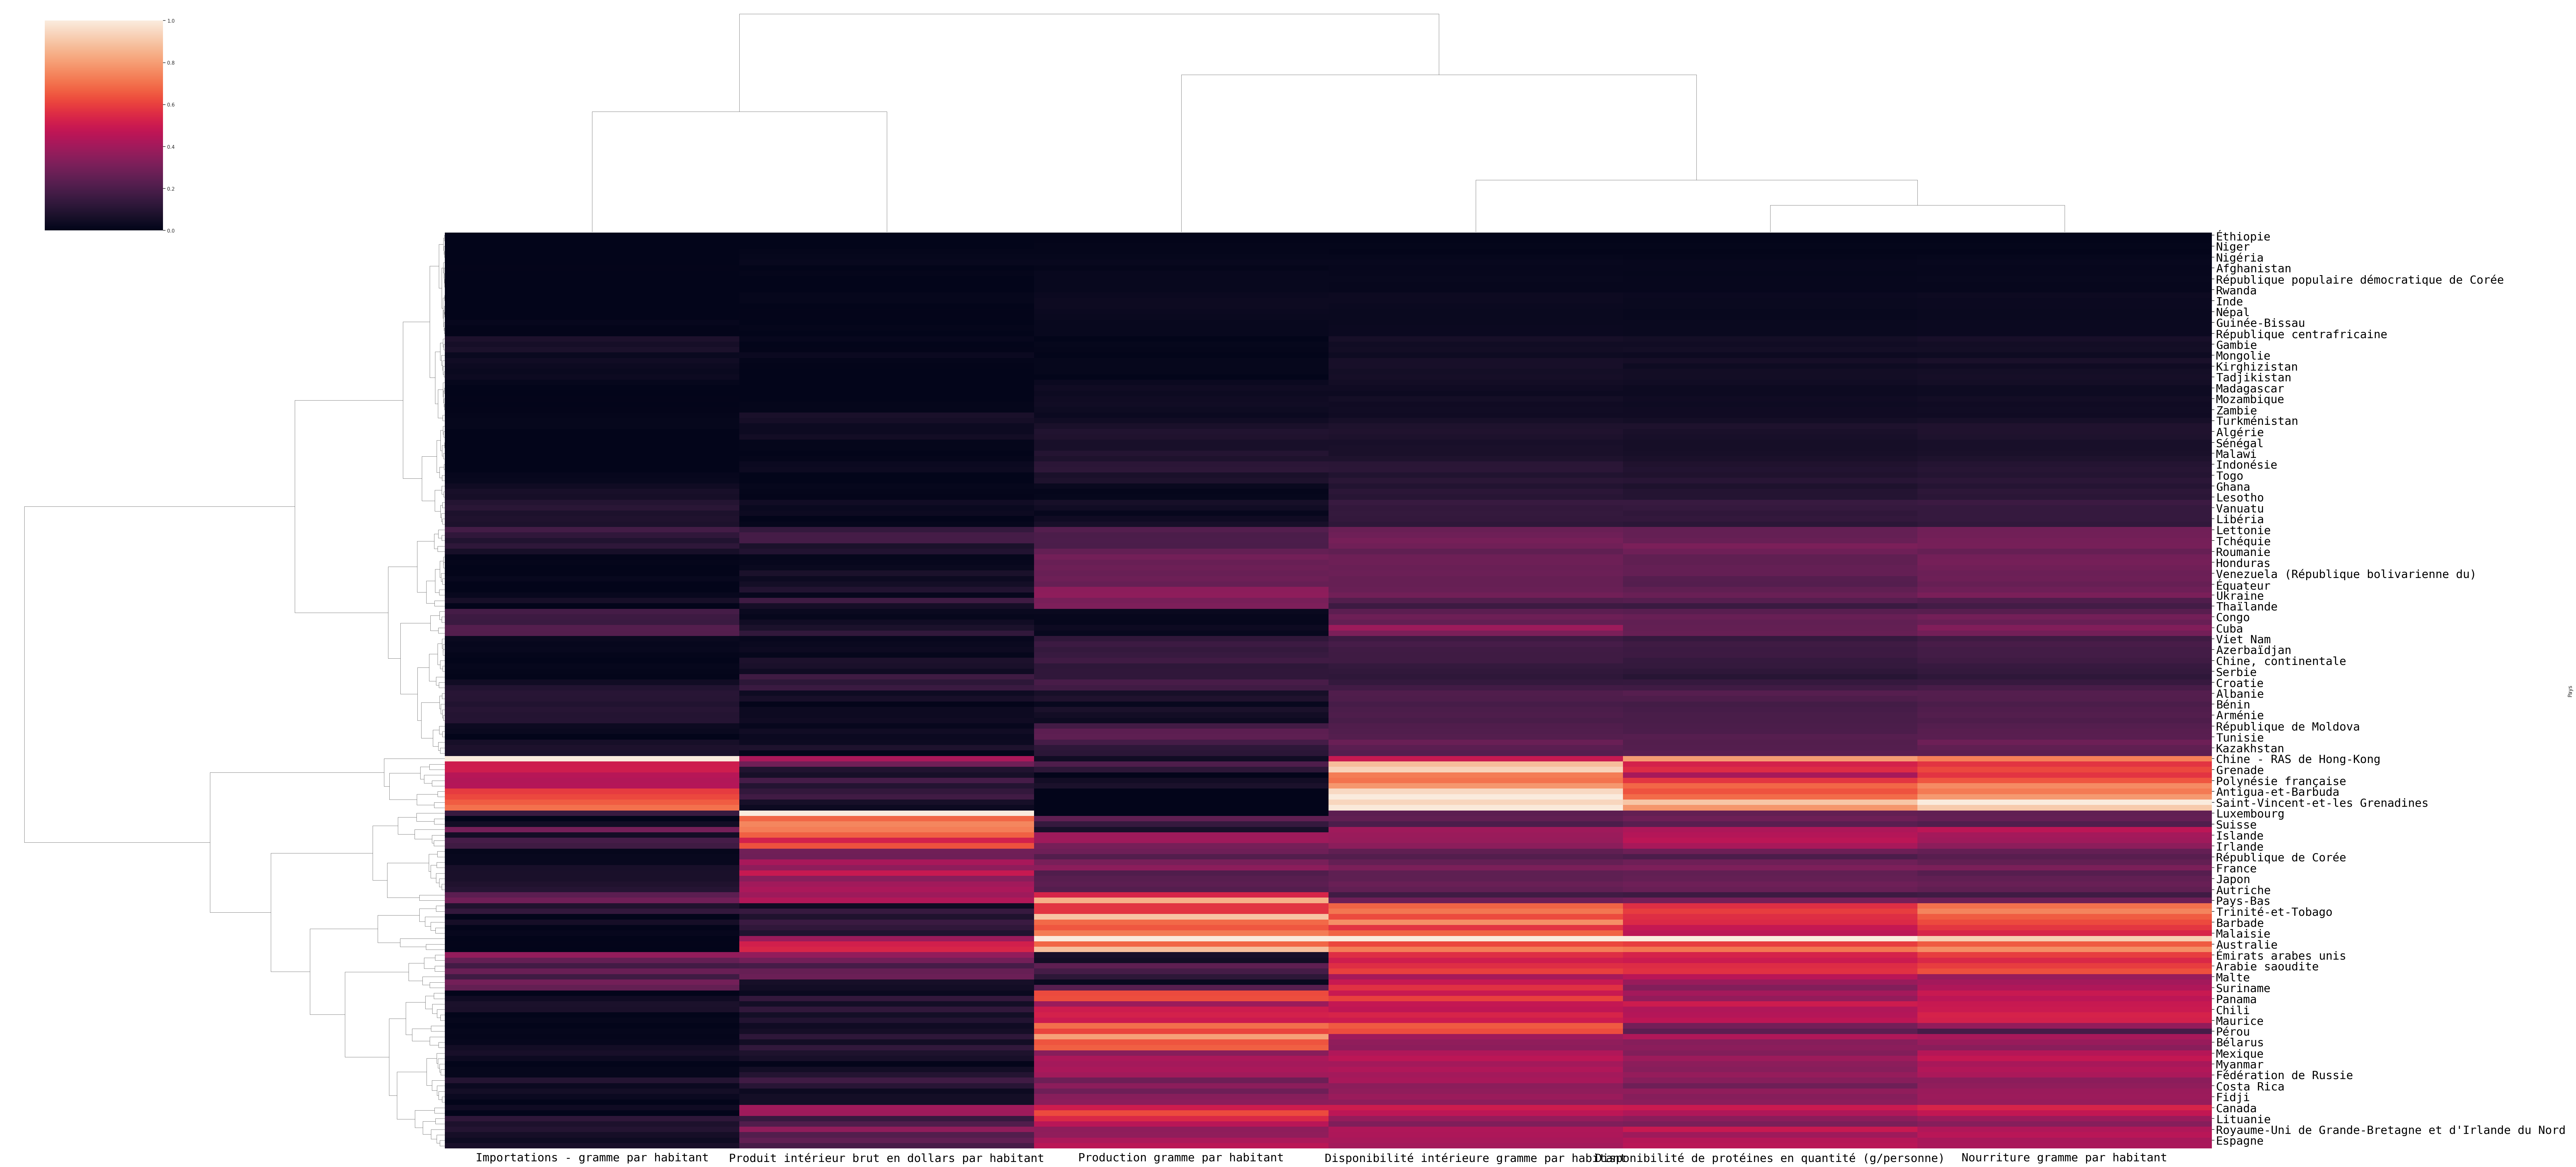

In [866]:

# Création d'une cluster map des variables et des pays

graph = sns.clustermap(final_df, metric="euclidean", standard_scale=1, method="ward",figsize=(75 ,37))

# Changement de la police eet de la mise en forme sur les axes x et y 

for label in graph.ax_heatmap.get_xticklabels():
  label.set_fontsize(26)
  label.set_color('black')
  label.set_fontfamily('monospace')

for label in graph.ax_heatmap.get_yticklabels():
    label.set_fontsize(26)
    label.set_color('black')
    label.set_fontfamily('monospace')
    
plt.show()

# 6. Définition du nombre optimal de clusters K-means

## a) Méthode du coude

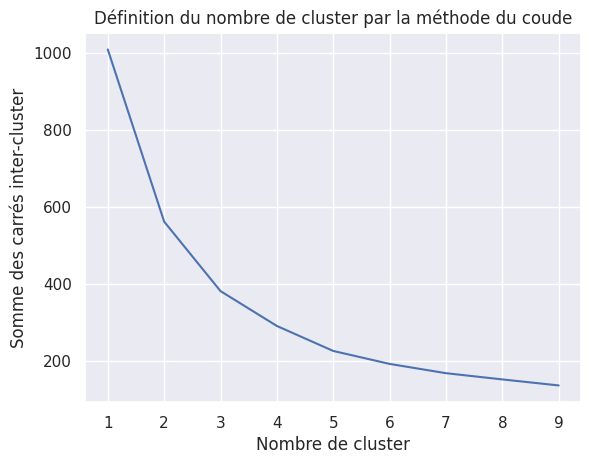

In [867]:
# Définition de la somme des carré inter-cluster pour chaque nombre de cluster

wcss = []
for i in range(1,10):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(scaled_X)
    wcss.append(km.inertia_)

plt.plot(range(1,10),wcss)
plt.title('Définition du nombre de cluster par la méthode du coude')
plt.xlabel('Nombre de cluster')
plt.ylabel('Somme des carrés inter-cluster')
plt.show()

-------------------

## b) Coefficient de silhouette

In [868]:

# Création d'une table vide qui contiendra le nombre de cluster et le coefficient de silhouette (somme des distance moyenne des points de données à leurs centroid) moyen pour un nombre de cluster donné
silhouette_tab = []

# Définition du la tranche de nombre de cluster à analyser
n_cluster_range = range(2,10)

# Remplissage des données de la tabéle silhouette 

for n_cluster in n_cluster_range:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_labels = kmeans.fit_predict(scaled_X)
    silhouette_tab.append(silhouette_score(scaled_X,cluster_labels))

fig = px.line(silhouette_tab)

fig.update_layout(
    xaxis_title="Clusters", yaxis_title="Coefficient de silhouette moyen", title = 'Graphique des coefficients de silhouette', showlegend = False
)

fig.show()

## c) Création d'une colonne cluster dans la table final (k-means)

In [869]:
kmeans = KMeans(n_clusters= 5)
cluster_labels = kmeans.fit_predict(scaled_X)+1
cluster_final_df = final_df.copy().reset_index()
cluster_final_df['cluster no'] = cluster_labels


Pour chaque méthodes utilisées nous avons trouvé les le nombre de cluster suivant :
- Méthode du dendogramme :  5 Clusters
- Méthode du coude : 5 clusters
- Méthode du coefficient de sihouette : 5 clusters


Nous allons choisir la méthode du coefficient silhouette pour définir notre nombre cluster.

Nous avons donc <b>5 clusters</b>

In [870]:
cluster_final_df.head()

,Pays,Disponibilité de protéines en quantité (g/personne),Importations - gramme par habitant,Production gramme par habitant,Disponibilité intérieure gramme par habitant,Nourriture gramme par habitant,Produit intérieur brut en dollars par habitant,cluster no
0,Afghanistan,194.4,798.983627,771.432467,1570.416094,1515.313775,520.616409,1
1,Afrique du Sud,5079.6,9016.000700,29240.609274,37151.535958,35695.644795,6121.876572,2
2,Albanie,2253.6,13175.372178,4507.364166,16295.855063,16295.855063,4514.204908,5
3,Algérie,709.2,48.321797,6644.247125,6692.568922,6378.477240,4109.696001,1
4,Allemagne,2865.6,10186.501412,18316.345769,21038.391871,19465.654124,44651.829102,3


# 7. Méthode PCA

Instanciation du module PCA

In [871]:
pca=PCA(n_components=6)


Passage des des données standardisé dans le modèle PCA.

In [872]:
pca.fit(scaled_X)


PCA(n_components=6)

## 7.1 Définition du nombre de composantes, par le graphique de l'éblouis des valeurs propres (somme cumulées des variance expliquée) => Diagramme de Paretto

In [873]:
# Calcul de la variance expliqué pour chaque comosante

scree = (pca.explained_variance_ratio_*100).round(2)
display(scree)


# Calcul du critère de Kaiser 
kaiser_crietria = round(100/len(final_df.columns),2)




array([63.41, 19.99, 13.31,  2.19,  0.93,  0.16])

In [874]:
# Calcul de la somme cumulé des variances expliqués pour un nombre de cluster défini

scree_cum = scree.cumsum().round()
scree_cum

array([ 63.,  83.,  97.,  99., 100., 100.])

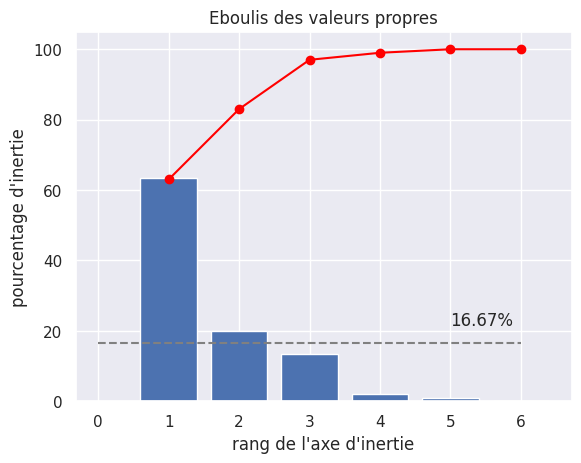

In [875]:
# Création du graphique de l'éblouis avec une ligne horizontale représentant le critère de kaiser 

x_list = range(1,len(final_df.columns)+1)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.hlines(kaiser_crietria,0,len(final_df.columns),colors= 'grey',linestyles='dashed')
plt.text(len(final_df.columns)-1,kaiser_crietria+5, str(kaiser_crietria)+'%')
plt.show(block=False)


En bleu nous avons la variance expliquée de chaque composante et en rouge la somme cumulée de ces composantes
<br><br>
Les composante PC1 et PC2 nous permettent de garder 83 % de l'information totale.
<br><br>
Le critère de Kaiser :On ne retient que les axes supérieurs au à l'inertie moyenne soit 100/6. Seul les deux premiers rangs ont une inertie supérieur à 16,67 %

## 7.2 Heatmap de corrélation des composantes et variables

In [876]:
# Définition des compsantes principales par variables 

pcs = pca.components_

# Création d'un df des composantes princiaples

pcs = pd.DataFrame(pcs)

In [877]:
# Définition des colonne et des index pour notre df des composantes princiaples et arrondis des composantes principales au centième

pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)


,Disponibilité de protéines en quantité (g/personne),Importations - gramme par habitant,Production gramme par habitant,Disponibilité intérieure gramme par habitant,Nourriture gramme par habitant,Produit intérieur brut en dollars par habitant
F1,0.51,0.32,0.29,0.49,0.50,0.26
F2,0.01,0.68,-0.71,0.05,0.03,-0.18
F3,-0.06,0.09,-0.17,-0.22,-0.16,0.94
F4,-0.24,0.65,0.62,-0.21,-0.30,-0.07
F5,0.51,0.03,0.02,-0.80,0.30,-0.11
F6,0.66,-0.03,-0.03,0.14,-0.74,-0.05


<u>Pour information :</u>
<br><br>
`F1` = Disponibilité de protéines en quantité (g/personne/jour)	* 0.13 + Importations - Quantité * Production * 0.18 + ... + Produit intérieur brut en dollars * 0.47


On transpose loa table des composantes

In [878]:
# Transposition du df
pcs = pcs.T

Chargement de `Seaborn`

In [879]:
sns.set()

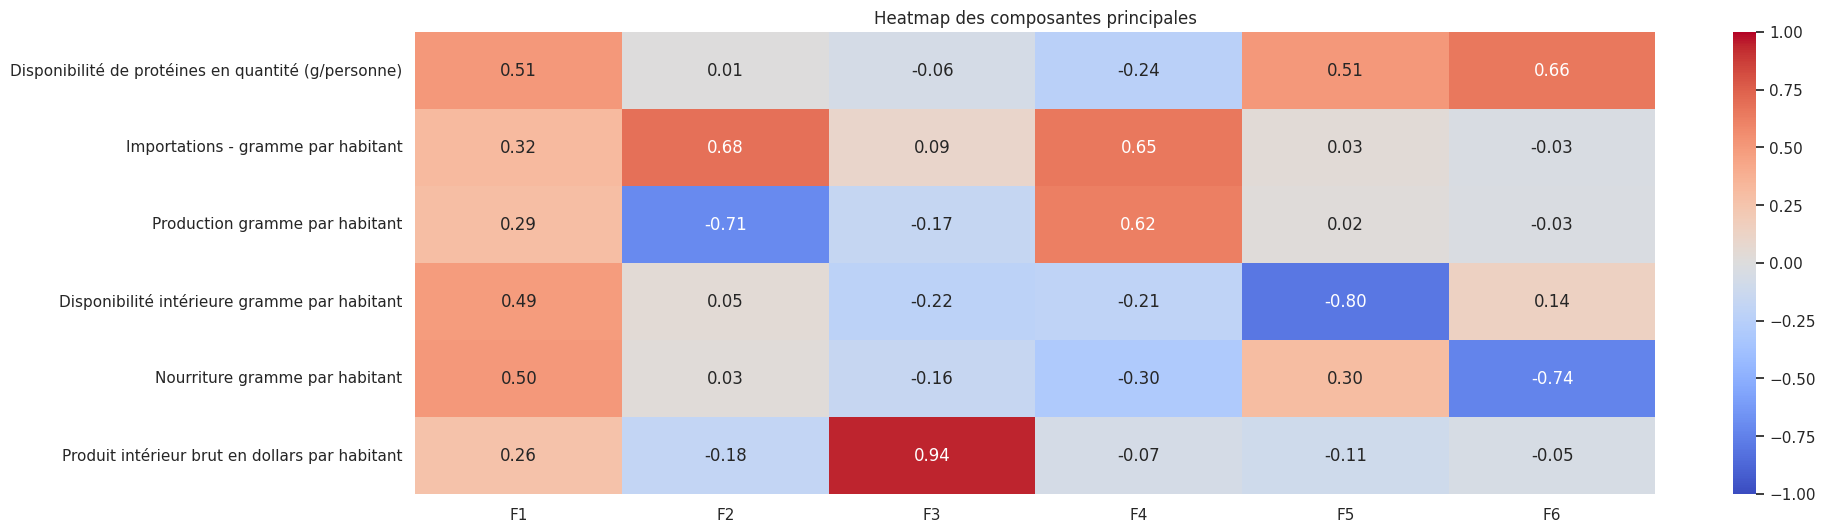

In [880]:
# Création d'une heatmap des composantes principales
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title('Heatmap des composantes principales')

plt.show()

Dans cette heatmap, nous constatons que l'explication de la composante principale 1 se fait grâce à trois variables :
- Disponibilité de protéines en quantité
- Disponibilité intérieur (g/hab)
- Nourriture (g/hab)
La seconde composante principale est majoritairement expliquée par les importations (g/hab).

# 8. Cercle des corrélations entre le composant 1 et 2

Dans le cadre de l’élaboration d’une méthode PCA le cercle de corrélation a pour but de définir la corrélation des variables avec les composantes principale étudié (la corrélation se fait de -1 à 1)

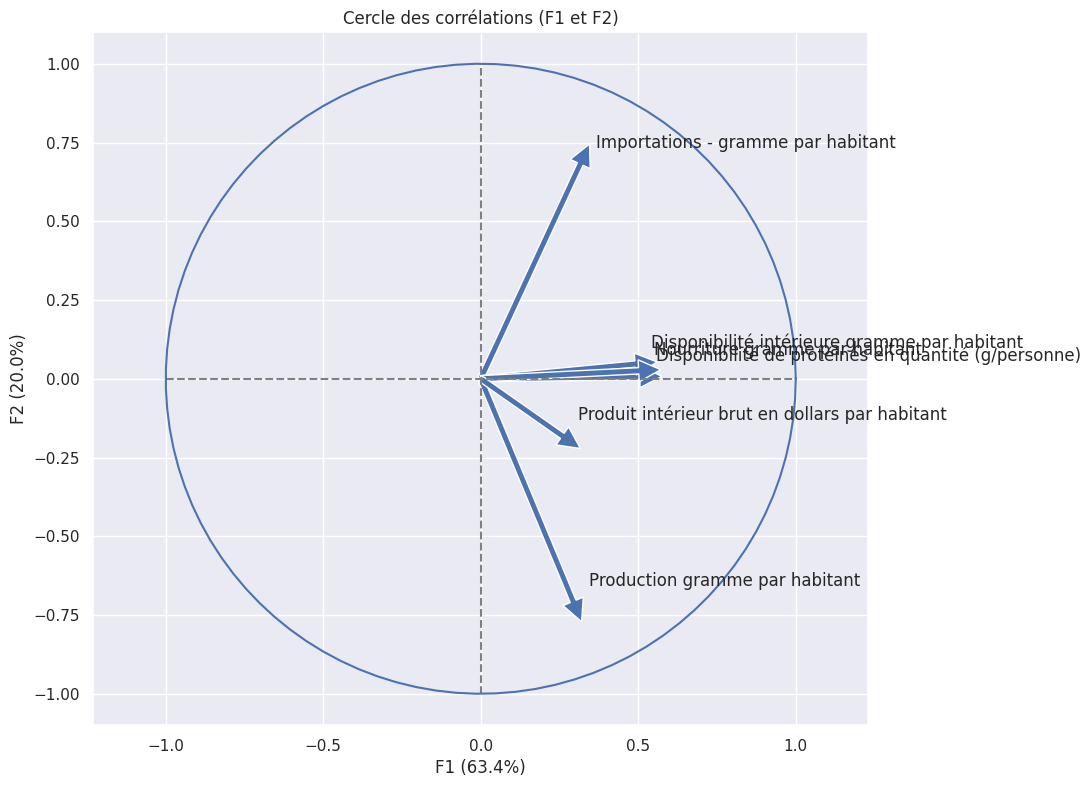

In [881]:
x, y = 0,1

# Création du graphique des cercle de corrélation 
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Début de la flèche à l'origine du plan
             pca.components_[0, i],  #0 pour PC1
             pca.components_[1, i],  #1 pour PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

# Définition d'un array de 0 à 2*pi avec 100 valeurs (pour création du cercle (angle radians cercle trigonométrique))
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Création du cercle en utilisant pour x cos(angle radians => an) et y sin(angle radians => an=)
plt.axis('equal')
plt.show(block=False)

# 9. Détermination du nombre de cluster optimal pour 2 composants avec la méthode du coefficient de silhouette 

In [882]:
# Détermination du nombre optimal de cluster à deux vu avec l'éblouis des valeurs propres

pca_graph=PCA(n_components= 2)
pca_graph.fit(scaled_X)
X_graph_proj = pca_graph.transform(scaled_X)


In [883]:
#Création de la table de coefficient de sihouette

silhouette_tab = []


for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(X_graph_proj)
    silhouette_tab.append(silhouette_score(X_graph_proj,cluster_labels))

fig = px.line(silhouette_tab)

fig.update_layout(
    xaxis_title="Clusters", yaxis_title="Coefficient de silhouette moyen", title = 'Graphique des coefficients de silhouette', showlegend = False
)

fig.show()

Ici on constate que le nombre de cluster optimal en utilisant la méthode du coefficient de silhouette est de 5

# 10. Représentation graphique des clusters avec deux composants et centroids de classe

In [884]:

columns_name = ['principal component 1','principal component 2']
# passage des pays en données de type series
country = pd.Series(data= country)


# Création d'un df pour les composantes priinciaples choisies
X_graph_proj = pd.DataFrame(data= X_graph_proj, columns= ['principal component 1','principal component 2'])

# MOdification du df final avec cluster en appliquant la méthode des composantes princiaples
cluster_final_df = pd.concat([X_graph_proj, country], axis = 1)



nb_cluster = 5

kmeans_1 = KMeans(n_clusters=nb_cluster)
predictions = kmeans_1.fit_predict(X_graph_proj)

# Création de la fonction qui rempli le df des centroids pour chaque cluster
def create_centroid_tab(kmeans,columns_n):
    centroid_tab_names = []
    for i in range(1,nb_cluster + 1):
        centroid_names = 'group centroid ' + str(i)
        centroids_coordinates = kmeans_1.cluster_centers_
        centroid_tab_names.append(centroid_names)
    columns_centroids = np.array(columns_n)
    centroid_tab = pd.DataFrame(columns= columns_centroids, data= centroids_coordinates)
    centroid_tab['Nom du centoid'] = centroid_tab_names
    return centroid_tab


centroid_tab = create_centroid_tab(kmeans_1,columns_name)

# Création du graphique qui affiche les composantes principale (cluster en couleur) et leur centroids (croix)
def draw_clusters_centroids(biased_dataset,centroid_tab, predictions,scree):

    clustered = pd.concat([biased_dataset, pd.DataFrame({'group':predictions+1})], axis=1)
    fig = go.Figure()

    fig.add_trace(go.Scatter(x = centroid_tab['principal component 1'],
                        y = centroid_tab['principal component 2'],
                        mode= 'markers',
                        text = centroid_tab['Nom du centoid'],
                        marker_color = 'red',
                        ))
    fig.update_traces(
    marker=dict(size=15, symbol="cross", line=dict(width=2, color="DarkSlateGrey")),
    selector=dict(mode="markers"),
)

    fig.add_trace(go.Scatter(x = clustered['principal component 1'],
                                y = clustered['principal component 2'],
                                marker = dict(color = ["orange", "red", "green", "blue"]),
                                mode= 'markers',
                                marker_color = clustered['group'],
                                text ='Group :' + clustered['group'].astype(str)  +'<br>Pays : ' + clustered['Pays'],
                                ))
    fig.update_layout(showlegend = False,
                    title = 'Clustering avec deux composants principaux et centroids de classe',
                    title_font = dict(family ="Courier New, monospace",
                                        size = 18,
                                        color = 'black'),
                    xaxis_title='PC1('+str(scree[0])+' %)', yaxis_title='PC2('+str(scree[1])+' %)')

    fig.show()
    return clustered

cluster_final_df = draw_clusters_centroids(cluster_final_df,centroid_tab, predictions,scree)


# 11. Détermination du numéro de cluster choisi

Nous choisirons le cluster grâce à la composante principale 2 qui est expliquée majoritairement par les imporations par habitant(notre but étant d'exporter). Avec ce choix nous faison fis de la taille du marché.

In [885]:
# Définition du cluster choisi en fonction de la composante principale 1

chosen_cluster = cluster_final_df[cluster_final_df['principal component 2'] == max(cluster_final_df['principal component 2'])].group.values
print('Nous avons choisi le cluster '+str(chosen_cluster[0]))

Nous avons choisi le cluster 3


In [886]:
country_group_df = cluster_final_df[['Pays','group']]

In [887]:
final_df = final_df.reset_index()


# 12. Box plot des variables du cluster choisi

In [888]:
# Ajout des numéro de group ou cluster à notre df final

final_df = pd.merge(final_df,country_group_df,how = 'outer', on = 'Pays')

In [889]:
# Création du df final du cluster choisi

final_chosen_df = final_df[final_df.group == chosen_cluster[0]]

x = 1

# Création de boxplot des variables du cluster choisi

fig = make_subplots(rows=2, cols=int(len(features)/2),
subplot_titles=features)
for i in features:
    row_nb = ceil(x/3)
    if x%3 == 0:
        col_nb = int(x%3)+3 
    else : col_nb = int(x%3)
    fig.add_trace(go.Box(y = final_chosen_df[i], hovertext = final_chosen_df['Pays'],name = i), row= row_nb,col = col_nb)
    x=x+1

fig.show()

display(final_chosen_df)

,Pays,Disponibilité de protéines en quantité (g/personne),Importations - gramme par habitant,Production gramme par habitant,Disponibilité intérieure gramme par habitant,Nourriture gramme par habitant,Produit intérieur brut en dollars par habitant,group
6,Antigua-et-Barbuda,6397.2,73355.270052,0.000000,73355.270052,52396.621466,15383.415191,3
13,Bahamas,5259.6,62867.545939,15716.886485,68106.508101,41911.697293,32376.129780,3
31,Chine - RAS de Hong-Kong,8013.6,124139.067509,3284.826483,38322.975637,53515.298121,46705.027813,3
43,Dominique,4147.2,55976.937502,0.000000,55976.937502,41982.703126,7286.797839,3
46,Émirats arabes unis,5328.0,45640.427426,5059.446920,43426.919399,43426.919399,40644.804043,3
62,Grenade,5580.0,63134.729513,9019.247073,72153.976586,45096.235366,10152.832810,3
86,Koweït,5713.2,33776.295894,13806.369125,46596.495796,46349.953490,29754.636332,3
113,Nouvelle-Calédonie,5058.0,32473.389861,3608.154429,39689.698719,39689.698719,33101.384337,3
124,Polynésie française,5832.0,54327.748441,3621.849896,54327.748441,47084.048649,21127.527812,3
135,Sainte-Lucie,6840.0,55262.663439,5526.266344,60788.929783,55262.663439,11034.684892,3


Nous avons ici affaire avec des petits états (la plupart du temps des îles) qui consomme énormément de volaille et sont assez dépendante des importations.

Selon toute vraisemblance, il serait judicieux de commencer l'exportation de volaile à Hong-Kong. En effet ce pays, a un niveau de vie élevé et une forte consommation de volaille, sans en produire lui-même.

# 12. Représentation des valeurs initiale du cluster choisi sous-forme d'histogramme

Histogramme des variables

Histogramme de Disponibilité de protéines en quantité (g/personne)
skw:
 0.5492544604022458
kur:
 -0.24904312673498463


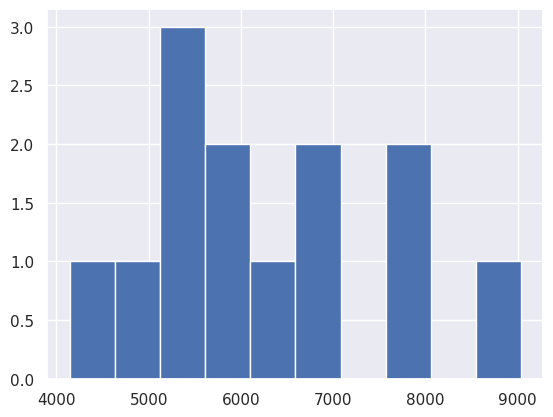

Histogramme de Importations - gramme par habitant
skw:
 0.9858778079430157
kur:
 1.7376833657941062


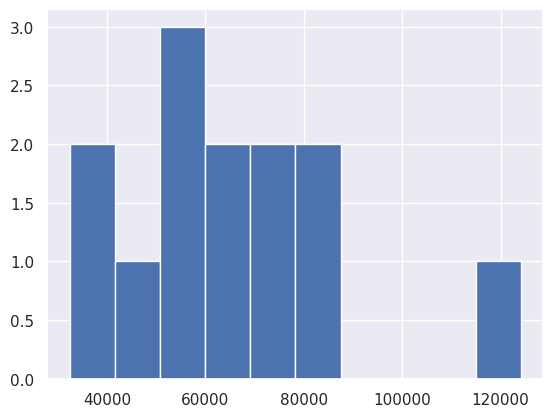

Histogramme de Production gramme par habitant
skw:
 1.1592444035813152
kur:
 0.4360617155415256


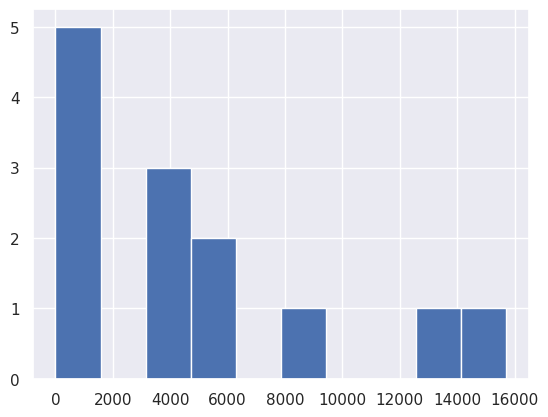

Histogramme de Disponibilité intérieure gramme par habitant
skw:
 -0.29261097953216875
kur:
 -1.5822883914982717


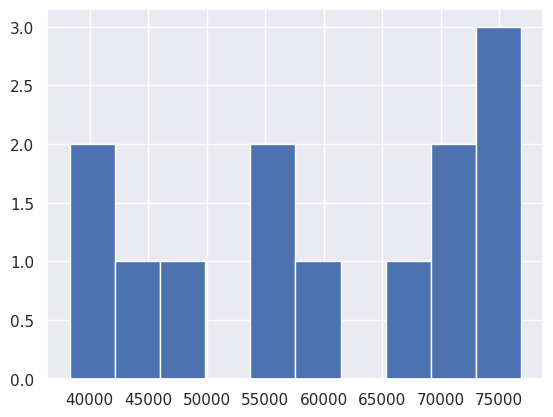

Histogramme de Nourriture gramme par habitant
skw:
 1.0332615102169818
kur:
 0.42196787621526566


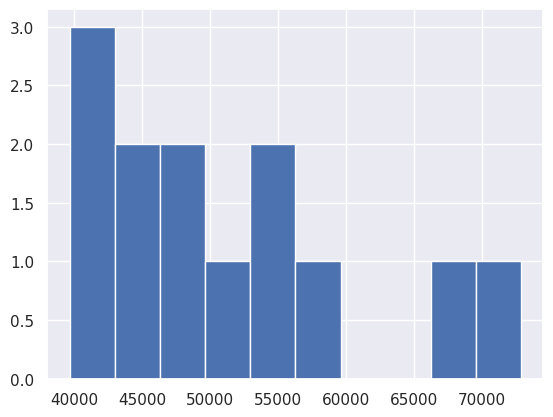

Histogramme de Produit intérieur brut en dollars par habitant
skw:
 0.49312053474540823
kur:
 -1.0155977014352122


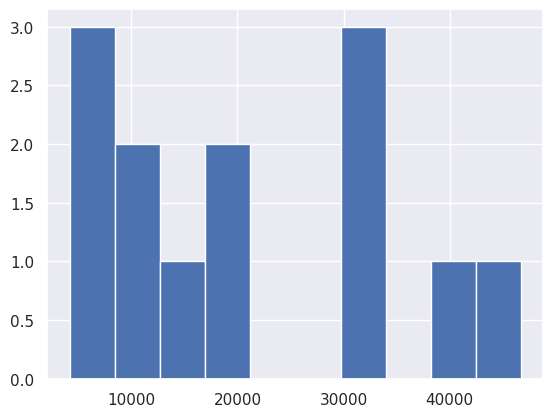

In [890]:
# Histogramme des variable du cluster choisi
for i in features:
    print('Histogramme de ' + i )
    final_chosen_df[i].hist()
    print("skw:\n",final_chosen_df[i].skew())
    print("kur:\n",final_chosen_df[i].kurtosis())
    plt.show()

# 13. Test d'adéquation à une distribution gaussienne et test ANOVA entre deux clusters en fonction de le corrélation en terme de comosante princiaples
Avec H0 : l'échantillon suit une distribution de type Gaussienne <br>
Avec H1 : l'écantillon ne suit pas une distribution de type Gaussienne <br>
Si H0 du test d'adéquation ne peur être rejeté alors élaboration d'un test de comparaison (d'égalité des variance) de type barlett et affichage de la p value du test d'adéquation <br>
La comparaison se fait avec le group 4 qui suit la même tendance sur la composante principales 1 <br>
Avec H0 : Il y a égalité des variances entre les échantillons <br>
Avec H1 : Il y a égalité des variances entre les échantillons <br>
On affiche la pvalue du test barlett et si pvalue < 0.05 test de comparaison des moyenness ttest_ind <br>
Avec H0 : Il y a égalité des moyennes entre les échantillons <br>
Avec H1 : Il y a égalité des moyennes entre les échantillons <br>
On affiche la pvalue du test de comparaison des moyennes et infirme ou valide H0 <br>

In [898]:
# Incrémentation des tests statistiques
comp_group_df = final_df[final_df['group'] == 5]

display(comp_group_df.head())
for i in features:
    print('Pour '+ i +' : \n')
    Data_pays_clusters_C1 = final_df.loc[(final_df["group"] == chosen_cluster[0]),i]
    Data_pays_clusters_C3 = final_df.loc[(final_df["group"] == 5),i] # Attention changer le nombre après chargement complet prendre le groupe dont la coordonnée x dans le scatter plot (PC1 ou F1) se rapproche le plus de notre centroid choisi.

    stat , p = stats.ks_2samp(final_chosen_df[i],list(np.random.normal(np.mean(final_chosen_df[i]), np.std(final_chosen_df[i]), 1000)))
    if p>=0.05:
        print(str(round(p,2)) + " est supérieur à 0.05. L'hypothèse H0 n'est ainsi pas rejetée.\nLa population du cluster suit une distribution Gaussienne.\n")
        stat_1, p_1 = bartlett(Data_pays_clusters_C1,Data_pays_clusters_C3)
        if p_1>=0.05:
            print(str(round(p_1,2)) + " est supérieur à 0.05. L'hypothèse H0 n'est ainsi pas rejetée.\nLes variances des deux clusters sont égales.\n")
            stat_2, p_2 =  ttest_ind(Data_pays_clusters_C1,Data_pays_clusters_C3, equal_var=False)
            if p_2>=0.05:
                print(str(round(p_2,2)) + " est supérieur à 0.05. L'hypothèse H0 n'est pas rejetée.\nLes moyennes des deux clusters sont égales.")
            else:print(str(round(p_2,2)) + " est inférieur à 0.05. L'hypothèse H0 est ainsi rejetée.\nLes moyennes des deux clusters ne sont pas égales.")
        else:print(str(round(p_1,2)) + " est inférieur à 0.05. L'hypothèse H0 est ainsi rejetée.\nLes variances des deux clusters ne sont pas égales.")
    else:print(str(round(p,2)) + " est inférieur à 0.05. L'hypothèse H0 est ainsi rejetée.\nLa population du cluster ne suit pas une distribution de type Gaussiennne.")

    print('\n')

,Pays,Disponibilité de protéines en quantité (g/personne),Importations - gramme par habitant,Production gramme par habitant,Disponibilité intérieure gramme par habitant,Nourriture gramme par habitant,Produit intérieur brut en dollars par habitant,group
8,Argentine,4870.8,182.078306,49183.902275,44654.704425,42242.166877,14648.845969,5
10,Australie,5976.0,650.813395,51617.637368,47631.405326,47631.405326,57628.863849,5
15,Barbade,5518.8,6987.338942,52405.042064,59392.381006,45417.703122,17419.313704,5
23,Brésil,5644.8,14.434609,68328.628108,48028.756128,48028.756128,9928.675992,5
29,Canada,4989.6,4954.794982,38576.618077,39012.204450,39012.204450,44906.748920,5


Pour Disponibilité de protéines en quantité (g/personne) : 

0.76 est supérieur à 0.05. L'hypothèse H0 n'est ainsi pas rejetée.
La population du cluster suit une distribution Gaussienne.

0.67 est supérieur à 0.05. L'hypothèse H0 n'est ainsi pas rejetée.
Les variances des deux clusters sont égales.

0.51 est supérieur à 0.05. L'hypothèse H0 n'est pas rejetée.
Les moyennes des deux clusters sont égales.


Pour Importations - gramme par habitant : 

0.92 est supérieur à 0.05. L'hypothèse H0 n'est ainsi pas rejetée.
La population du cluster suit une distribution Gaussienne.

0.0 est inférieur à 0.05. L'hypothèse H0 est ainsi rejetée.
Les variances des deux clusters ne sont pas égales.


Pour Production gramme par habitant : 

0.57 est supérieur à 0.05. L'hypothèse H0 n'est ainsi pas rejetée.
La population du cluster suit une distribution Gaussienne.

0.01 est inférieur à 0.05. L'hypothèse H0 est ainsi rejetée.
Les variances des deux clusters ne sont pas égales.


Pour Disponibilité intéri